In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import util

In [ ]:
https://github.com/Noahbisht0/chestXray-dataset.git

In [ ]:
train_results = pd.read_csv("train_preds.csv")
valid_results = pd.read_csv("valid_preds.csv")
class_labels = ['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Atelectasis',
 'Pneumothorax',
 'Pleural_Thickening',
 'Pneumonia',
 'Fibrosis',
 'Edema',
 'Consolidation']
pred_labels = [l + "_pred" for l in class_labels]

In [ ]:
y = valid_results[class_labels].values
pred = valid_results[pred_labels].values

In [ ]:
valid_results[np.concatenate([class_labels,pred_labels])].head()

,Cardiomegaly,Emphysema,Effusion,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Cardiomegaly_pred,Emphysema_pred,Effusion_pred,Hernia_pred,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.714810,0.100277,0.186449,0.812808,0.256020,0.266928,0.312440,0.460342,0.079453,0.271495,0.276861,0.398799,0.015867,0.156320
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.613431,0.233874,0.117079,0.840591,0.382199,0.176825,0.465807,0.489424,0.084595,0.377318,0.363582,0.638024,0.025948,0.144419
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.007762,0.062787,0.032811,0.158754,0.427727,0.115513,0.249030,0.035105,0.238761,0.167095,0.166389,0.262463,0.007758,0.125790
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006888,0.096380,0.054953,0.655706,0.158596,0.259460,0.334870,0.266489,0.073371,0.229834,0.191281,0.344348,0.008559,0.119153
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.053560,0.075098,0.226518,0.228736,0.536762,0.198797,0.273110,0.186771,0.242122,0.309786,0.411771,0.244666,0.126930,0.342409


<BarContainer object of 14 artists>

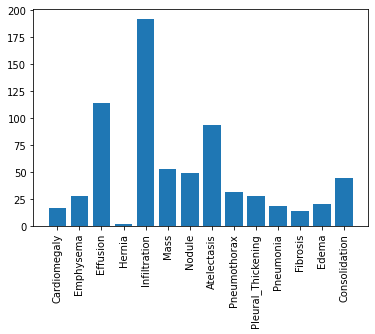

In [ ]:
plt.xticks(rotation=90)
plt.bar(x=class_labels,height=y.sum(axis=0))

In [ ]:
def true_positives(y,pred,th=0.5):
  TP = 0
  thresholded_preds = pred >= th
  TP = np.sum((y == 1) & (thresholded_preds == 1))
  return TP 
def true_negatives(y,pred,th=0.5):
  TN = 0
  thresholded_preds = pred >= th
  TN = np.sum((y == 0) & (thresholded_preds == 0))
  return TN
def false_positives(y,pred,th=0.5):
  FP = 0
  thresholded_preds = pred >= th
  FP = np.sum((y == 0) & (thresholded_preds == 1))
  return FP
def false_negatives(y,pred,th=0.5):
  FN = 0
  thresholded_preds = pred >= th
  FN = np.sum((y == 1) & (thresholded_preds == 0))
  return FN

In [ ]:
from IPython.display import display
df = pd.DataFrame({'y_test': [1,1,0,0,0,0,0,0,0,1,1,1,1,1],
                   'preds_test': [0.8,0.7,0.4,0.3,0.2,0.5,0.6,0.7,0.8,0.1,0.2,0.3,0.4,0],
                   'category': ['TP','TP','TN','TN','TN','FP','FP','FP','FP','FN','FN','FN','FN','FN']
                  })
display(df)
y_test = df['y_test']
preds_test = df['preds_test']
threshold = 0.5
print(f"""our function calculated:
TP:{true_positives(y_test,preds_test,threshold)}
TN:{true_negatives(y_test,preds_test,threshold)}
FP:{false_positives(y_test,preds_test,threshold)}
FN:{false_negatives(y_test,preds_test,threshold)}
""")


,y_test,preds_test,category
0,1,0.8,TP
1,1,0.7,TP
2,0,0.4,TN
3,0,0.3,TN
4,0,0.2,TN
5,0,0.5,FP
6,0,0.6,FP
7,0,0.7,FP
8,0,0.8,FP
9,1,0.1,FN


our function calculated:
TP:2
TN:3
FP:4
FN:5



In [ ]:
util.get_performance_metrics(y,pred,class_labels)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


In [ ]:
def get_accuracy(y,pred,th=0.5):
  accuracy = 0.0
  TP = true_positives(y,pred,th=0.5)
  FP = false_positives(y,pred,th=0.5)
  TN = true_negatives(y,pred,th=0.5)
  FN = false_negatives(y,pred,th=0.5)
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  return accuracy

In [ ]:
y_test = np.array([1, 0, 0, 1, 1])
preds_test = np.array([0.8, 0.8, 0.4, 0.6, 0.3])
print(f"computed accuracy: {get_accuracy(y_test,preds_test)}")

computed accuracy: 0.6


In [ ]:
util.get_performance_metrics(y,pred,class_labels,acc=get_accuracy)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


In [ ]:
get_accuracy(valid_results["Emphysema"].values,np.zeros(len(valid_results)))

0.972

In [ ]:
def get_prevalence(y):
  prevalence = 0.0
  prevalence = np.mean(y == 1)
  return prevalence


In [ ]:
y_test = np.array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])
print(f"computed prevalence: {get_prevalence(y_test)}")

computed prevalence: 0.4


In [ ]:
util.get_performance_metrics(y,pred,class_labels,acc=get_accuracy,prevalence=get_prevalence)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,Not Defined,0.5


In [ ]:
def get_sensitivity(y,pred,th=0.5):
  sensitivity = 0.5
  TP = true_positives(y,pred,th=0.5)
  FN = false_negatives(y,pred,th=0.5)
  sensitivity = TP / (TP + FN)
  return sensitivity
def get_specificity(y,pred,th=0.5):
  TN = true_negatives(y,pred,th=0.5)
  FP = false_positives(y,pred,th=0.5)
  specificity = TN / (TN + FP)
  return specificity

In [ ]:
y_test = np.array([1, 0, 0, 1, 1])
preds_test = np.array([0.8, 0.8, 0.4, 0.6, 0.3])
print(f"computed sensitivity: {get_sensitivity(y_test, preds_test, threshold):.2f}")
print(f"computed specificity: {get_specificity(y_test, preds_test, threshold):.2f}")

computed sensitivity: 0.67
computed specificity: 0.50


In [ ]:
util.get_performance_metrics(y,pred,class_labels,acc=get_accuracy,prevalence=get_prevalence,sens=get_sensitivity,spec=get_specificity)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,0.941,0.828,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,0.714,0.894,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,0.868,0.779,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,0.5,0.744,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,0.594,0.672,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,0.755,0.833,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,0.571,0.769,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,0.681,0.725,Not Defined,Not Defined,Not Defined,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,0.75,0.811,Not Defined,Not Defined,Not Defined,Not Defined,0.5


In [ ]:
def get_ppv(y,pred,th=0.5):
  PPV = 0.0
  TP = true_positives(y,pred,th=0.5)
  FP = false_positives(y,pred,th=0.5)
  PPV = TP / (TP + FP)
  return PPV
def get_npv(y,pred,th=0.5):
  NPV = 0.0
  TN = true_negatives(y,pred,th=0.5)
  FN = false_negatives(y,pred,th=0.5)
  NPV = TN/ (TN + FN)
  return NPV

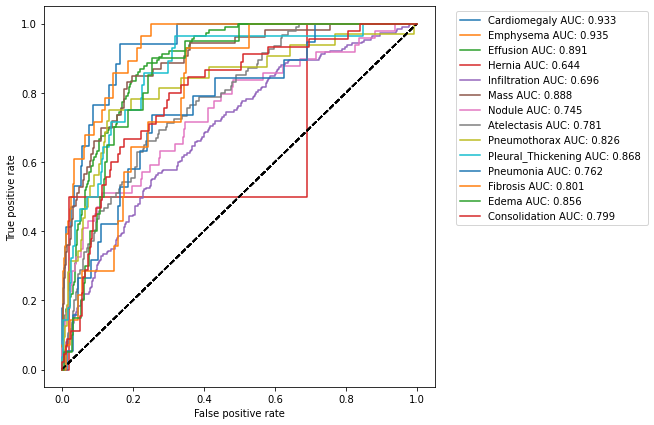

In [ ]:
util.get_curve(y,pred,class_labels)

In [ ]:
from sklearn.metrics import roc_auc_score
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv, auc=roc_auc_score)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,0.941,0.828,0.086,0.999,0.933,Not Defined,0.5
Emphysema,20,869,103,8,0.889,0.028,0.714,0.894,0.163,0.991,0.935,Not Defined,0.5
Effusion,99,690,196,15,0.789,0.114,0.868,0.779,0.336,0.979,0.891,Not Defined,0.5
Hernia,1,743,255,1,0.744,0.002,0.5,0.744,0.004,0.999,0.644,Not Defined,0.5
Infiltration,114,543,265,78,0.657,0.192,0.594,0.672,0.301,0.874,0.696,Not Defined,0.5
Mass,40,789,158,13,0.829,0.053,0.755,0.833,0.202,0.984,0.888,Not Defined,0.5
Nodule,28,731,220,21,0.759,0.049,0.571,0.769,0.113,0.972,0.745,Not Defined,0.5
Atelectasis,64,657,249,30,0.721,0.094,0.681,0.725,0.204,0.956,0.781,Not Defined,0.5
Pneumothorax,24,785,183,8,0.809,0.032,0.75,0.811,0.116,0.99,0.826,Not Defined,0.5


In [ ]:
def bootstrap_auc(y, pred, classes, bootstraps = 100, fold_size = 1000):
    statistics = np.zeros((len(classes), bootstraps))

    for c in range(len(classes)):
        df = pd.DataFrame(columns=['y', 'pred'])
        df.loc[:, 'y'] = y[:, c]
        df.loc[:, 'pred'] = pred[:, c]
        df_pos = df[df.y == 1]
        df_neg = df[df.y == 0]
        prevalence = len(df_pos) / len(df)
        for i in range(bootstraps):
            pos_sample = df_pos.sample(n = int(fold_size * prevalence), replace=True)
            neg_sample = df_neg.sample(n = int(fold_size * (1-prevalence)), replace=True)

            y_sample = np.concatenate([pos_sample.y.values, neg_sample.y.values])
            pred_sample = np.concatenate([pos_sample.pred.values, neg_sample.pred.values])
            score = roc_auc_score(y_sample, pred_sample)
            statistics[c][i] = score
    return statistics

statistics = bootstrap_auc(y, pred, class_labels)

In [ ]:
util.print_confidence_intervals(class_labels,statistics)

,Mean AUC (CI 5%-95%)
Cardiomegaly,0.93 (0.90-0.96)
Emphysema,0.94 (0.91-0.96)
Effusion,0.89 (0.87-0.91)
Hernia,0.63 (0.30-0.99)
Infiltration,0.70 (0.67-0.73)
Mass,0.89 (0.84-0.92)
Nodule,0.74 (0.67-0.80)
Atelectasis,0.79 (0.75-0.82)
Pneumothorax,0.83 (0.76-0.91)
Pleural_Thickening,0.87 (0.81-0.91)


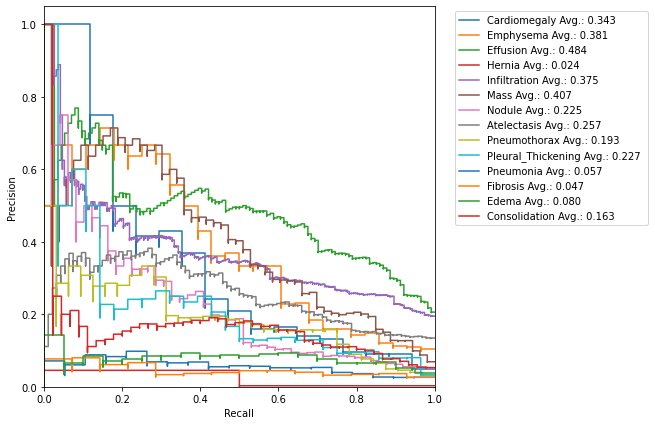

In [ ]:
util.get_curve(y,pred,class_labels,curve='prc')

In [ ]:
from sklearn.metrics import f1_score
util.get_performance_metrics(y, pred, class_labels, acc=get_accuracy, prevalence=get_prevalence, 
                        sens=get_sensitivity, spec=get_specificity, ppv=get_ppv, npv=get_npv, auc=roc_auc_score,f1=f1_score)

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.83,0.017,0.941,0.828,0.086,0,0.933,0.158,0.5
Emphysema,20,869,103,8,0.889,0.028,0.714,0.894,0.163,0,0.935,0.265,0.5
Effusion,99,690,196,15,0.789,0.114,0.868,0.779,0.336,0,0.891,0.484,0.5
Hernia,1,743,255,1,0.744,0.002,0.5,0.744,0.004,0,0.644,0.008,0.5
Infiltration,114,543,265,78,0.657,0.192,0.594,0.672,0.301,0,0.696,0.399,0.5
Mass,40,789,158,13,0.829,0.053,0.755,0.833,0.202,0,0.888,0.319,0.5
Nodule,28,731,220,21,0.759,0.049,0.571,0.769,0.113,0,0.745,0.189,0.5
Atelectasis,64,657,249,30,0.721,0.094,0.681,0.725,0.204,0,0.781,0.314,0.5
Pneumothorax,24,785,183,8,0.809,0.032,0.75,0.811,0.116,0,0.826,0.201,0.5


In [ ]:
from sklearn.calibration import calibration_curve
def plot_calibration_curve(y,pred):
  plt.figure(figsize=(20,20))
  for i in range(len(class_labels)):
    plt.subplot(4,4,i+1)
    fraction_of_positives,mean_predicted_value = calibration_curve(y[:,i],pred[:,i],n_bins=20)
    plt.plot([0,1],[0,1],linestyle="--")
    plt.plot(mean_predicted_value,fraction_of_positives,marker=".")
    plt.xlabel("predicted value")
    plt.ylabel("fraction of positives")
    plt.title(class_labels[i])
  plt.tight_layout()
  plt.show()

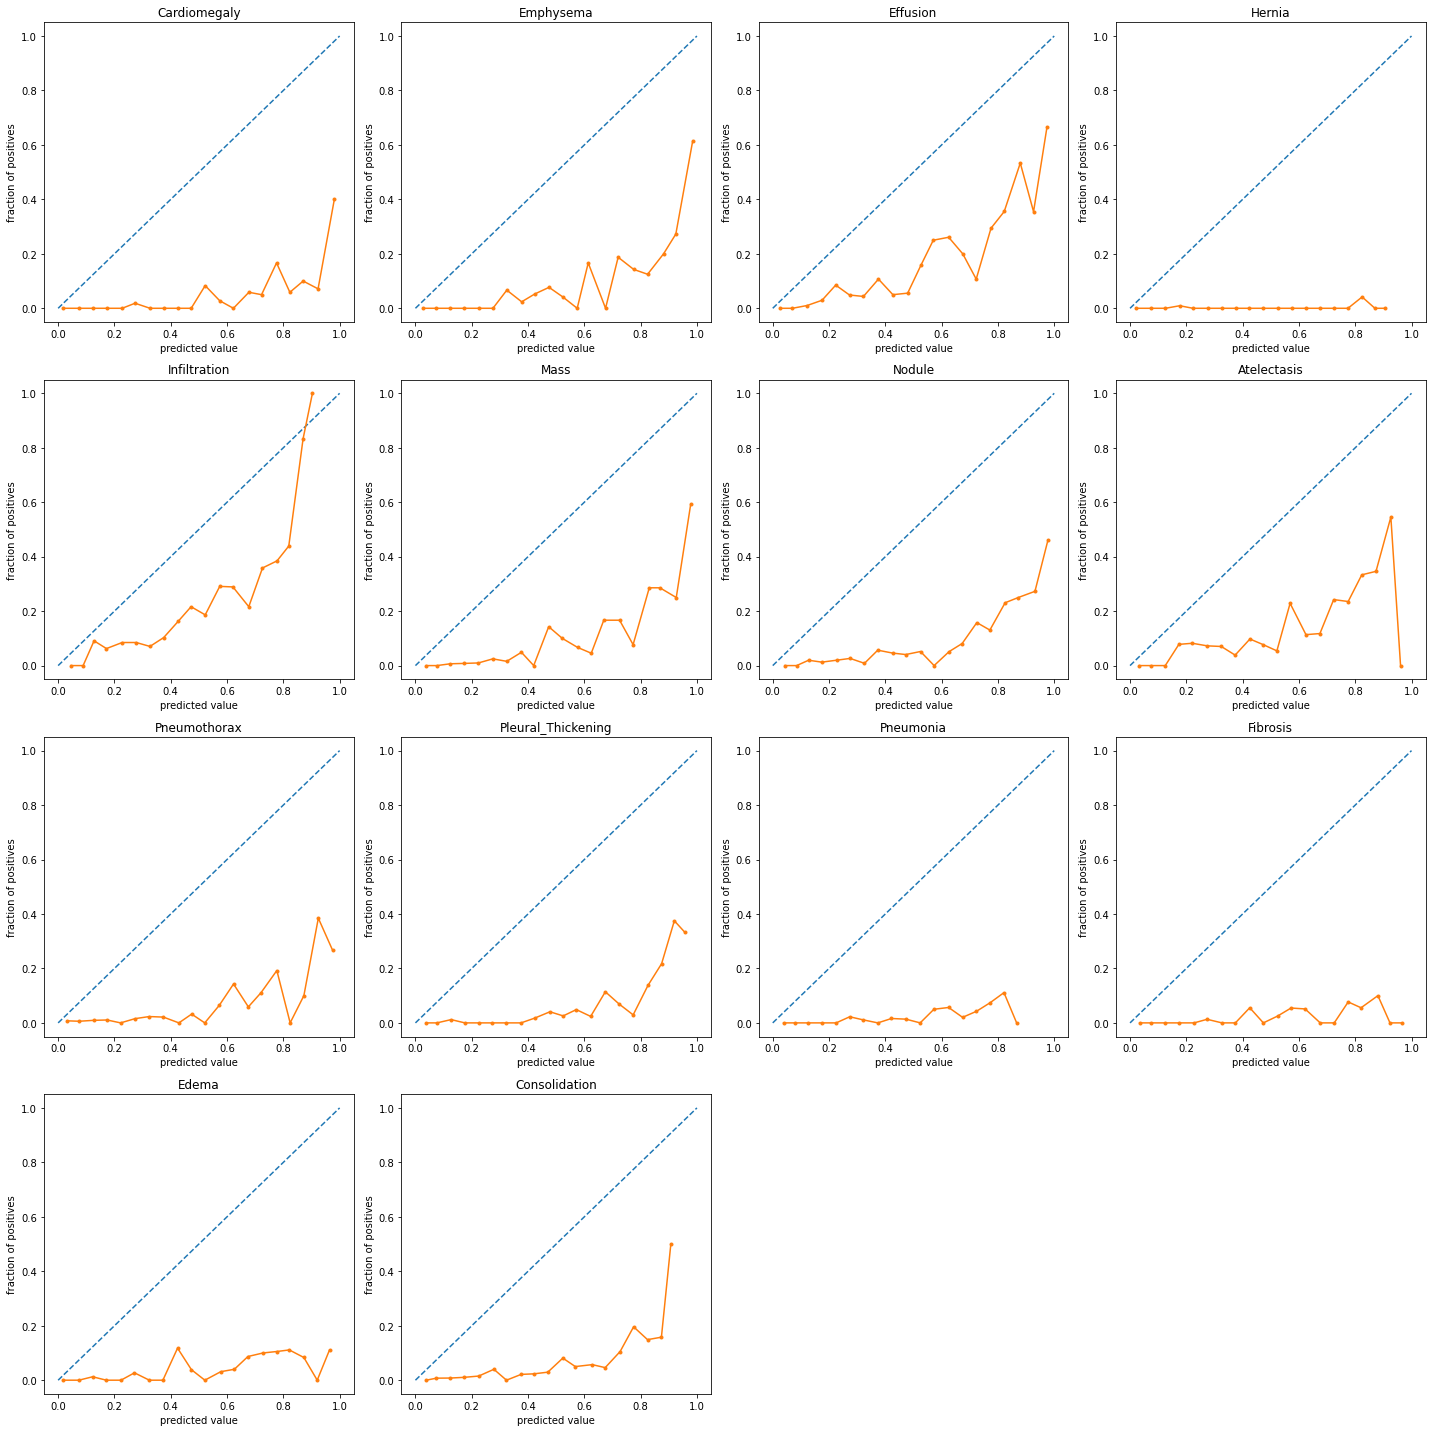

In [ ]:
plot_calibration_curve(y,pred)

In [ ]:
from sklearn.linear_model import LogisticRegression as lr 
y_train = train_results[class_labels].values
pred_train = train_results[pred_labels].values
pred_calibrated = np.zeros_like(pred)
for i in range(len(class_labels)):
  lrr = lr(solver="liblinear",max_iter=1000)
  lrr.fit(pred_train[:,i].reshape(-1,1),y_train[:,i])
  pred_calibrated[:,i] = lrr.predict_proba(pred[:,i].reshape(-1,1))[:,1]

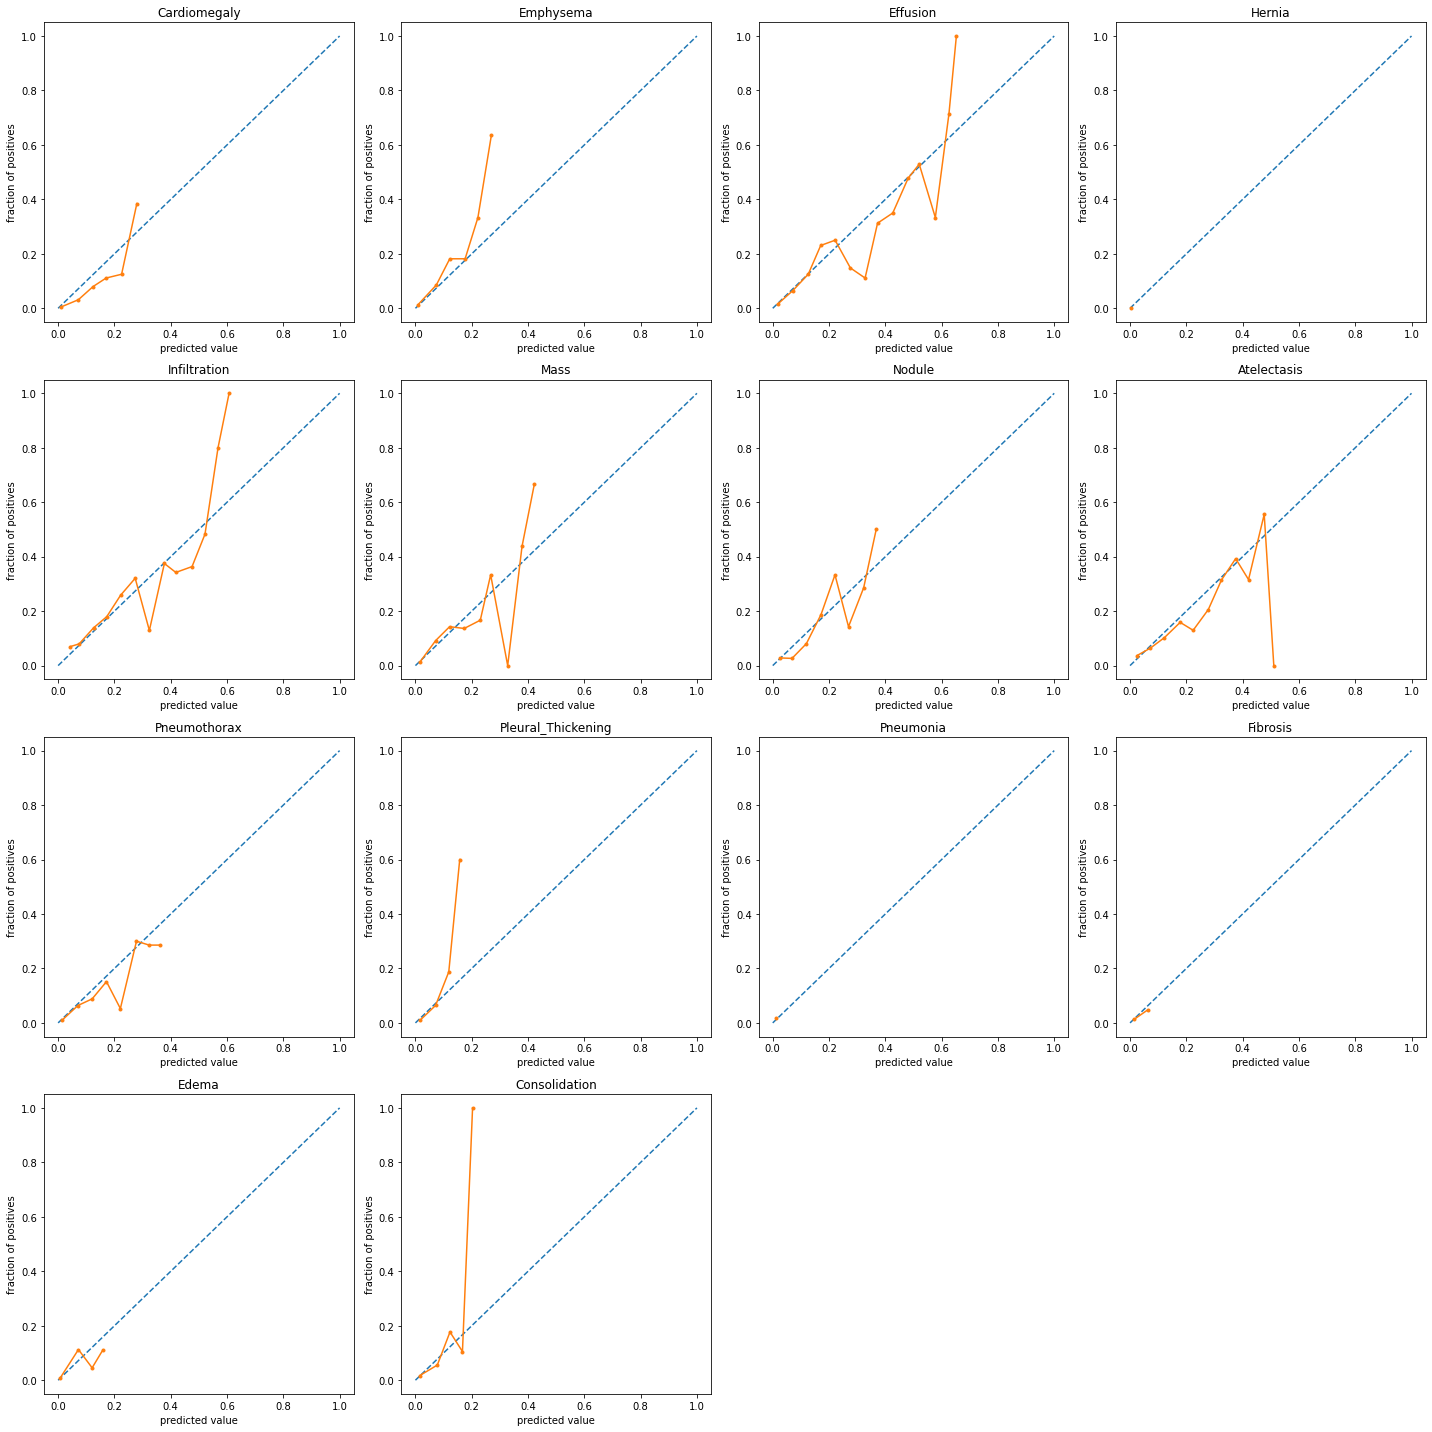

In [ ]:
plot_calibration_curve(y[:,], pred_calibrated)